In [1]:
import numpy as np
import math
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt

In [2]:
def construct_X(M, alphas, s, t, u, alp, Np = None):
    # The parameters s, t, u and alp are used to optimize the Plot.
    if Np == None:
        Np = math.ceil(np.sqrt(2)*M)
    
    D = M*M
    N = Np*len(alphas)
    print(Np)
    # calculate gradient: g = tan(alpha)
    
    # constructing C
    
    # coordinates[0] --> b
    # coordinates[1] --> a
    coordinates = np.mgrid[0:M,0:M]
    C = np.empty([2, D])
    C[0] = coordinates[1].flatten()+t
    C[1] = coordinates[0].flatten()+u
    
    # calculate n
    n_values = []
    for alpha in alphas:
        theta = math.radians(alpha+ alp)
        n_values.append([np.cos(theta),np.sin(theta)])
    
    n = np.asarray(n_values)
    n =n.reshape((1,len(alphas),2))
    
    # have to find out what value s is...
    #s = 1
    p = n.dot(C) + s
    
    # constructing X (N*D Matrix)
    #X = np.zeros([N,D])
    coordinates = np.mgrid[0:N,0:D]
    i_indices = coordinates[0].flatten()
    j_indices = coordinates[1].flatten()
    #print(i_indices)
    #print(j_indices)
    weights = np.zeros([N*D])
    iterations = len(p[0])
    #print(p)
    for i, alphas_p in enumerate(p[0]):
        #print(alphas_p.shape)
        #print(alphas_p)
        iteration = i+1
        offset = i*Np
        for idx, elem_p in enumerate(alphas_p):
            #print(elem_p)
            #print(f'index: {offset_D + math.floor(elem_p)}')
            #weights[idx + M*(offset_D + math.floor(elem_p))] = 1-(elem_p%1)
            #weights[idx + M*(offset_D + math.ceil(elem_p))] = (elem_p%1)
            #print(f'elem: {elem_p} floor:{math.floor(elem_p)} D:{D*(offset + math.ceil(elem_p))}')
            if not elem_p > Np and not elem_p < 0:
                #print(elem_p)
                weights[idx + D*(offset + math.floor(elem_p-1))] = 1-(elem_p%1)
                weights[idx + D*(offset + math.ceil(elem_p-1))] = (elem_p%1)
            
        print(f"{iteration} / {iterations}")
    
    X = coo_matrix((weights, (i_indices, j_indices)), shape=(N, D), dtype = np.float32)
        
    return X
        

<span style ="color:green;font-weight:bold ">Comments:  
    - It would have been better to vectorize in order to make it more efficient. 
    - The parameters s, t, u, alp are unnecessary and it is possible to determine X without them. The add unnecessary complexity.  
</span >

In [5]:
X_test =construct_X(10, [-33, 1, 42], .5, -5, -5, 15)
plt.imshow(X_test.todense())

15
1 / 3
2 / 3
3 / 3


In [6]:
X_test =construct_X(10, [-33, 1, 42], .5, 5, 1, 20, 15)
plt.imshow(X_test.todense())

15
1 / 3
2 / 3
3 / 3


15
1 / 3
2 / 3
3 / 3


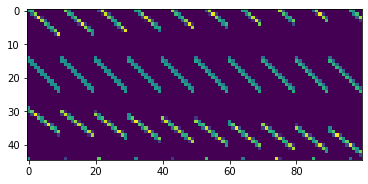

In [75]:
X_test =construct_X(10, [-33, 1, 42], .5, 0, 0, 0, 15)
plt.imshow(X_test.todense())

In [12]:
X_example = np.load('hs_tomography/X_example.npy')
plt.imshow(X_example)

As you can see the the two plots look a bit different.

<span style ="color:green;font-weight:bold ">Comments:  
    - Nice to show the example X.  
    - Could have calculated to square deviation to determine how different they are. </span >

In [13]:
np.mgrid[0:15,0:9]

array([[[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2],
        [ 3,  3,  3,  3,  3,  3,  3,  3,  3],
        [ 4,  4,  4,  4,  4,  4,  4,  4,  4],
        [ 5,  5,  5,  5,  5,  5,  5,  5,  5],
        [ 6,  6,  6,  6,  6,  6,  6,  6,  6],
        [ 7,  7,  7,  7,  7,  7,  7,  7,  7],
        [ 8,  8,  8,  8,  8,  8,  8,  8,  8],
        [ 9,  9,  9,  9,  9,  9,  9,  9,  9],
        [10, 10, 10, 10, 10, 10, 10, 10, 10],
        [11, 11, 11, 11, 11, 11, 11, 11, 11],
        [12, 12, 12, 12, 12, 12, 12, 12, 12],
        [13, 13, 13, 13, 13, 13, 13, 13, 13],
        [14, 14, 14, 14, 14, 14, 14, 14, 14]],

       [[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 0,  1,  2,  3,  4,  5,

In [14]:
coordinates = np.mgrid[0:15,0:9]
print(coordinates[0].flatten())

[ 0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 13 13 13
 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14]


## 4 Recovering the image

In [15]:
from scipy.sparse.linalg import lsqr

In [16]:
alphas_77 = np.load('hs_tomography/alphas_77.npy')
alphas_195 = np.load('hs_tomography/alphas_195.npy')
y_77 = np.load('hs_tomography/y_77.npy')
y_195 = np.load('hs_tomography/y_195.npy')

109
1 / 90
2 / 90
3 / 90
4 / 90
5 / 90
6 / 90
7 / 90
8 / 90
9 / 90
10 / 90
11 / 90
12 / 90
13 / 90
14 / 90
15 / 90
16 / 90
17 / 90
18 / 90
19 / 90
20 / 90
21 / 90
22 / 90
23 / 90
24 / 90
25 / 90
26 / 90
27 / 90
28 / 90
29 / 90
30 / 90
31 / 90
32 / 90
33 / 90
34 / 90
35 / 90
36 / 90
37 / 90
38 / 90
39 / 90
40 / 90
41 / 90
42 / 90
43 / 90
44 / 90
45 / 90
46 / 90
47 / 90
48 / 90
49 / 90
50 / 90
51 / 90
52 / 90
53 / 90
54 / 90
55 / 90
56 / 90
57 / 90
58 / 90
59 / 90
60 / 90
61 / 90
62 / 90
63 / 90
64 / 90
65 / 90
66 / 90
67 / 90
68 / 90
69 / 90
70 / 90
71 / 90
72 / 90
73 / 90
74 / 90
75 / 90
76 / 90
77 / 90
78 / 90
79 / 90
80 / 90
81 / 90
82 / 90
83 / 90
84 / 90
85 / 90
86 / 90
87 / 90
88 / 90
89 / 90
90 / 90


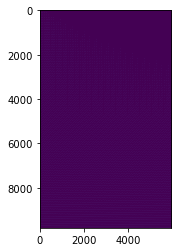

In [61]:
X_77_test =construct_X(77, alphas_77, 0, 0, 0, 0, 109)
plt.imshow(X_77_test.todense())

In [62]:
X_77_csc = X_77_test.tocsc()

In [63]:
X_77_csc

<9810x5929 sparse matrix of type '<class 'numpy.float32'>'
	with 58163490 stored elements in Compressed Sparse Column format>

In [64]:
number_nz = X_77_test.count_nonzero()
print(number_nz)

800204


In [65]:
X_77 = np.load('hs_tomography/X_77.npy', allow_pickle=True).item(0)

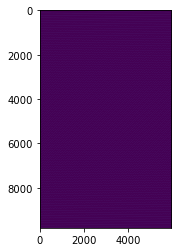

In [66]:
plt.imshow(X_77.todense())

In [67]:
nz = X_77.count_nonzero()
print(nz)

1066978


<span style ="color:green;font-weight:bold ">Comments:  
    -  Why show the matrix X if nothing can be seen?   
    - number of nonzero elements calculated correctly, but sparsity = 1 - (number of nonzero elements)/(total nuber of elements)</span >

In [68]:
X_77

<9810x5929 sparse matrix of type '<class 'numpy.float32'>'
	with 1066978 stored elements in Compressed Sparse Column format>

In [69]:
x, istop, itn, normr = lsqr(X_77, y_77)[:4]

In [70]:
x.shape

(5929,)

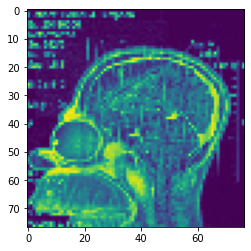

In [71]:
plt.imshow(x.reshape((77,77)))

<span style ="color:green;font-weight:bold ">Comments:  
    -  Correct reconstruction of the image using the X_77 from zip file and the lsqr function (lsqr was also used in the sample solution) </span >

With the X_77 from the zip-file we can reengineer the image.

## 5 Minimizing the radiation dose

<span style ="color:green;font-weight:bold ">Comments:  
    -  Missing :( </span >